In [1]:
import numpy as np
import scipy.stats as sps
from copy import deepcopy

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)
%matplotlib inline

### Критерий Смирнова

$X_1, ..., X_n$ и $Y_1, ..., Y_m$ --- независимые выборки, имеющие непрерывные функции распределения $F$ и $G$ соответственно.

$H_0: F = G$

$H_1: F \not= G$

Альтернатива двусторонняя, б*о*льшие значения статистики являются более экстремальными.

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html#scipy.stats.ks_2samp">`ks_2samp`</a>`(data1, data2): statistic, pvalue`

In [2]:
def ecdf(sample):
    """ Точки для построения ЭФР """
    
    x = deepcopy(list(sample)*2 + [sample.min()-0.5, sample.max()+0.5])
    y = deepcopy(list(np.linspace(0, 1, len(sample)+1)) * 2)
    return np.sort(x), np.sort(y)


def max_diff(x1, x2, y1, y2):
    """ Вычисляет, где достигается максимальная разница """
    
    x_all, y_all = np.hstack([x1, x2]), np.hstack([y1, y2])
    order = np.argsort(x_all)
    x_all, y_all = x_all[order], y_all[order]
    i = np.argmax(np.abs(y_all[1:] - y_all[:-1]))
    return (x_all[i+1] + x_all[i]) / 2, y_all[i], y_all[i+1]

In [4]:
def apply_smirnov(distr1, distr2, size1=100, size2=100):
    """ 
    Генерирует выборки из заданных распределений, 
    строит графики теоретических и эмпирических функций распределения,
    применяет критерий Смирнова
    """
    
    sample_1 = distr1.rvs(size=size1)
    sample_2 = distr2.rvs(size=size2)
    
    x_min = min(distr1.ppf(0.01), distr2.ppf(0.01))
    x_max = max(distr1.ppf(0.99), distr2.ppf(0.99))
    grid = np.linspace(x_min, x_max, 200)

    plt.figure(figsize=(16, 5))
    
    plt.subplot(121)
    plt.plot(grid, distr1.cdf(grid), lw=3)
    plt.plot(grid, distr2.cdf(grid), lw=3)
    plt.title('CDF')
    
    plt.subplot(122)
    x1, y1 = ecdf(sample_1)
    plt.plot(x1, y1, lw=3)
    x2, y2 = ecdf(sample_2)
    plt.plot(x2, y2, lw=3)
    plt.vlines(*max_diff(x1, x2, y1, y2))
    plt.title('ECDF')
    
    print(sps.ks_2samp(sample_1, sample_2))

Ks_2sampResult(statistic=0.54, pvalue=1.402153914254165e-13)


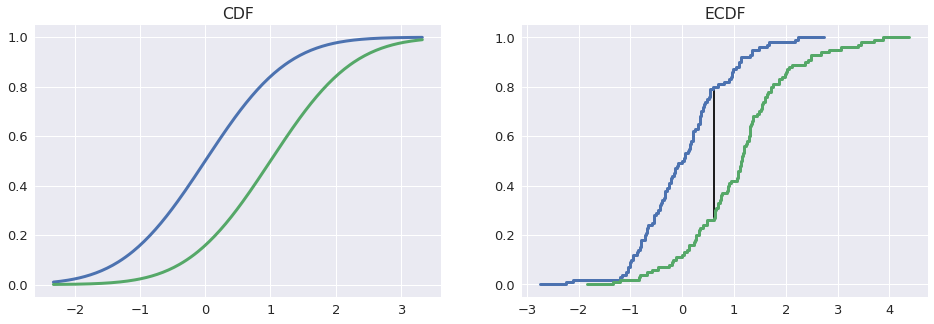

In [5]:
apply_smirnov(sps.norm(loc=0), sps.norm(loc=1))

Ks_2sampResult(statistic=0.22533333333333333, pvalue=0.09680680034213579)


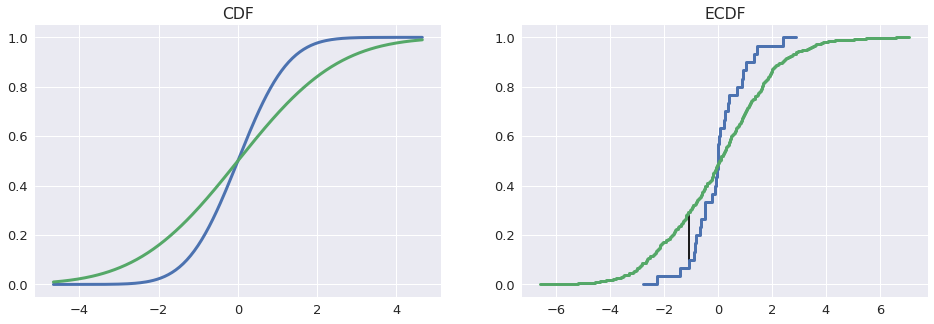

In [6]:
apply_smirnov(sps.norm(loc=0, scale=1), sps.norm(loc=0, scale=2), 
              size1=30, size2=500)

Ks_2sampResult(statistic=0.19600000000000006, pvalue=6.677306264218927e-09)


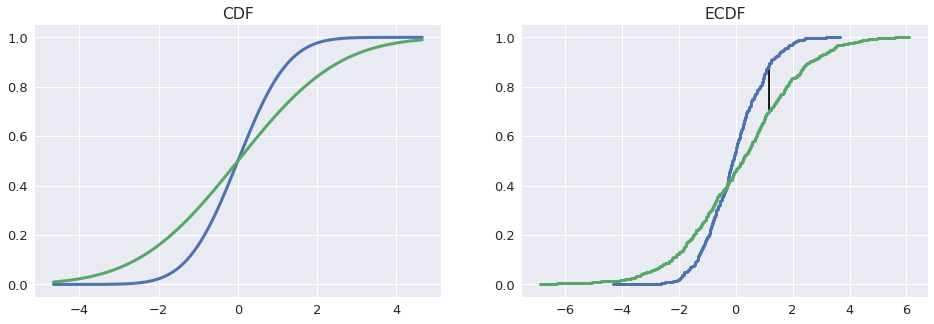

In [7]:
apply_smirnov(sps.norm(loc=0, scale=1), sps.norm(loc=0, scale=2), 
              size1=500, size2=500)

Ks_2sampResult(statistic=0.013360000000000039, pvalue=0.00026257784609734584)


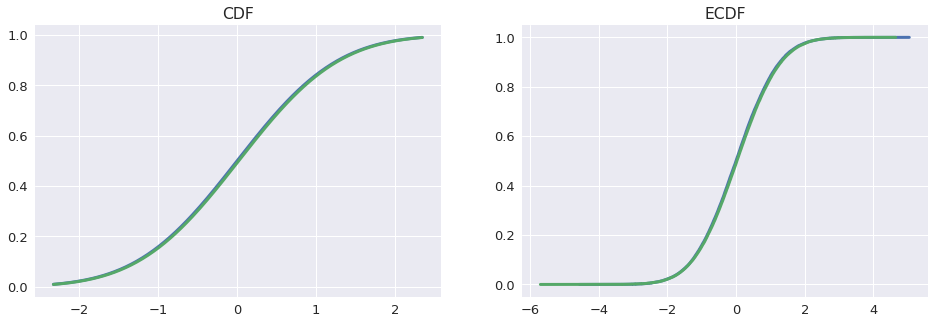

In [8]:
apply_smirnov(sps.norm, sps.norm(loc=0.02), 
              size1=50000, size2=50000)

Ks_2sampResult(statistic=0.24, pvalue=0.005042695196242107)


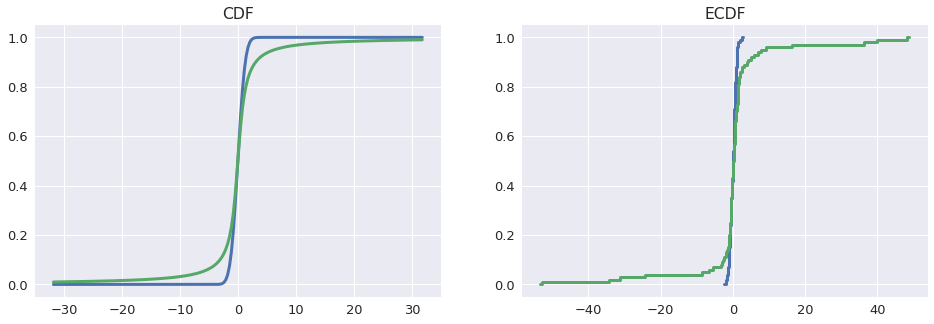

In [9]:
apply_smirnov(sps.norm, sps.cauchy)

Ks_2sampResult(statistic=0.14, pvalue=0.26055273160812736)


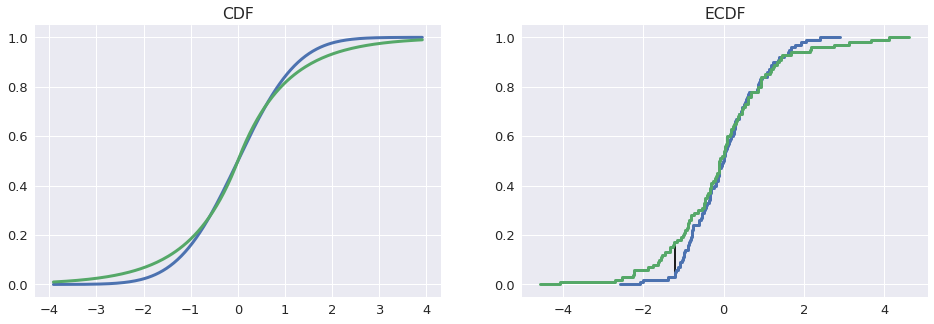

In [10]:
apply_smirnov(sps.norm, sps.laplace)

### Критерий ранговых сумм Уилкоксона-Манна-Уитни (независимые выборки)

$X_1, ..., X_n$ и $Y_1, ..., Y_m$ --- независимые выборки, имеющие непрерывные функции распределения $F$ и $G$ соответственно.

------

**"Критерий Уилкоксона"**

$H_0: F = G$

$H_1: \{F \leqslant G \text{ или } F \geqslant G\}$ (это не значит, что $H_1: F \not= G$)

Используется нормированная версия статистики $V = S_1 + ... + S_m$ --- сумма рангов наблюдений $Y_j$ по объединенной выборке.

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html#scipy.stats.ranksums">`ranksums`</a>`(data1, data2): statistic, pvalue`

------

**"Критерий Манна-Уитни"**

$H_0: F = G$

$H_1: F \leqslant G$ или $H_1: F \geqslant G$ или $H_1: \{F \leqslant G \text{ или } F \geqslant G\}$

Используется статистика $U = \sum\limits_{i=1}^n \sum\limits_{j=1}^m I\{X_i < Y_j\}$, причем $U = V - \frac{m(m+1)}{2}$.

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu">`mannwhitneyu`</a>`(data1, data2, use_continuity=True, alternative=None): statistic, pvalue`

* `use_continuity` -- использовать ли поправку 0.5 на непрерывность
* `alternative='less'` -- используется альтернатива $H_1: F \leqslant G$
* `alternative='greater'` -- используется альтернатива $H_1: F \geqslant G$
* `alternative='two-sided'` -- используется альтернатива $H_1: \{F \leqslant G \text{ или } F \geqslant G\}$, причем эквивалентен `ranksums`

In [11]:
def print_tests(sample_1, sample_2):
    print(sps.ranksums(sample_1, sample_2))
    print('two-sided:', sps.mannwhitneyu(sample_1, sample_2, alternative='two-sided'))
    print('less:     ', sps.mannwhitneyu(sample_1, sample_2, alternative='less'))
    print('greater:  ', sps.mannwhitneyu(sample_1, sample_2, alternative='greater'))

In [12]:
print_tests(sps.norm.rvs(size=100), sps.norm.rvs(size=100))

RanksumsResult(statistic=-1.566212276647833, pvalue=0.11729892958541079)
two-sided: MannwhitneyuResult(statistic=4359.0, pvalue=0.11758511756951201)
less:      MannwhitneyuResult(statistic=4359.0, pvalue=0.058792558784756005)
greater:   MannwhitneyuResult(statistic=4359.0, pvalue=0.9414933556604188)


In [13]:
print_tests(sps.norm.rvs(size=100), sps.norm(loc=1).rvs(size=100))

RanksumsResult(statistic=-6.150009828896405, pvalue=7.747814539770197e-10)
two-sided: MannwhitneyuResult(statistic=2483.0, pvalue=7.80771874651874e-10)
less:      MannwhitneyuResult(statistic=2483.0, pvalue=3.90385937325937e-10)
greater:   MannwhitneyuResult(statistic=2483.0, pvalue=0.9999999996155821)


In [14]:
print_tests(sps.norm.rvs(size=100), sps.norm(loc=1, scale=10).rvs(size=100))

RanksumsResult(statistic=-1.2998828879510875, pvalue=0.19364111088061986)
two-sided: MannwhitneyuResult(statistic=4468.0, pvalue=0.1940602273430182)
less:      MannwhitneyuResult(statistic=4468.0, pvalue=0.0970301136715091)
greater:   MannwhitneyuResult(statistic=4468.0, pvalue=0.9033886702640546)


In [15]:
print_tests(sps.cauchy.rvs(size=100), sps.cauchy(loc=1).rvs(size=100))

RanksumsResult(statistic=-5.771284551391859, pvalue=7.866949775840236e-09)
two-sided: MannwhitneyuResult(statistic=2638.0, pvalue=7.924196921077947e-09)
less:      MannwhitneyuResult(statistic=2638.0, pvalue=3.9620984605389735e-09)
greater:   MannwhitneyuResult(statistic=2638.0, pvalue=0.9999999960949476)


### Критерий ранговых сумм Уилкоксона (парные выборки)

$X_1, ..., X_n$ и $Y_1, ..., Y_n$ --- связные выборки, имеющие непрерывные функции распределения $F$ и $G$ соответственно.

$Z_i = Y_i - X_i = \theta + \varepsilon_i$

$H_0: \theta = 0$

$H_1: \theta \not= 0$ 

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#scipy.stats.wilcoxon">`wilcoxon`</a>`(x, y=None, zero_method='wilcox'): statistic, pvalue`

* `x`, `y` --- выборки. Если `y=None`, то в `x` разности.
* `zero_method='pratt'` -- нулевые разности остаются (более консервативен)
* `zero_method='wilcox'` -- нулевые разности выкивываются
* `zero_method='zsplit'` -- нулевые разности распределяются между положительными и отрицательными рангами

In [16]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sample_1 + sps.norm(loc=0, scale=0.5).rvs(size=100)
sps.wilcoxon(sample_1, sample_2)

WilcoxonResult(statistic=2157.0, pvalue=0.20576253719593485)

In [17]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sample_1 + sps.norm(loc=0.5, scale=0.5).rvs(size=100)
sps.wilcoxon(sample_1, sample_2)

WilcoxonResult(statistic=312.0, pvalue=2.7619723166512835e-14)

In [18]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sample_1 + sps.norm(loc=-0.5, scale=0.5).rvs(size=100)
sps.wilcoxon(sample_1, sample_2)

WilcoxonResult(statistic=426.0, pvalue=5.312985024488013e-13)

Времена реакции (Лагутин, стр. 221)

In [19]:
sample_1 = [176, 163, 152, 155, 156, 178, 160, 164, 169, 155, 122, 144]
sample_2 = [168, 215, 172, 200, 191, 197, 183, 174, 176, 155, 115, 163]
print('wilcox:', sps.wilcoxon(sample_1, sample_2))
print('pratt: ', sps.wilcoxon(sample_1, sample_2, zero_method='pratt'))
print('zsplit:', sps.wilcoxon(sample_1, sample_2, zero_method='zsplit'))

wilcox: WilcoxonResult(statistic=4.5, pvalue=0.011197738894413023)
pratt:  WilcoxonResult(statistic=6.5, pvalue=0.010726857857329037)
zsplit: WilcoxonResult(statistic=7.0, pvalue=0.011997435448298963)


---------

Прикладная статистика и анализ данных, 2019

Никита Волков

https://mipt-stats.gitlab.io/